# Count Entity

In [2]:

import re

import pandas as pd
import numpy as np
import os

import seaborn as sns
from matplotlib import pyplot as plt

,Object,Entity,Count
0,ថូម៉ាស,PER,24
1,ផីធឺ,PER,24
2,សាលា CADT,ORG,72
3,សាលា CADT,ORG,6


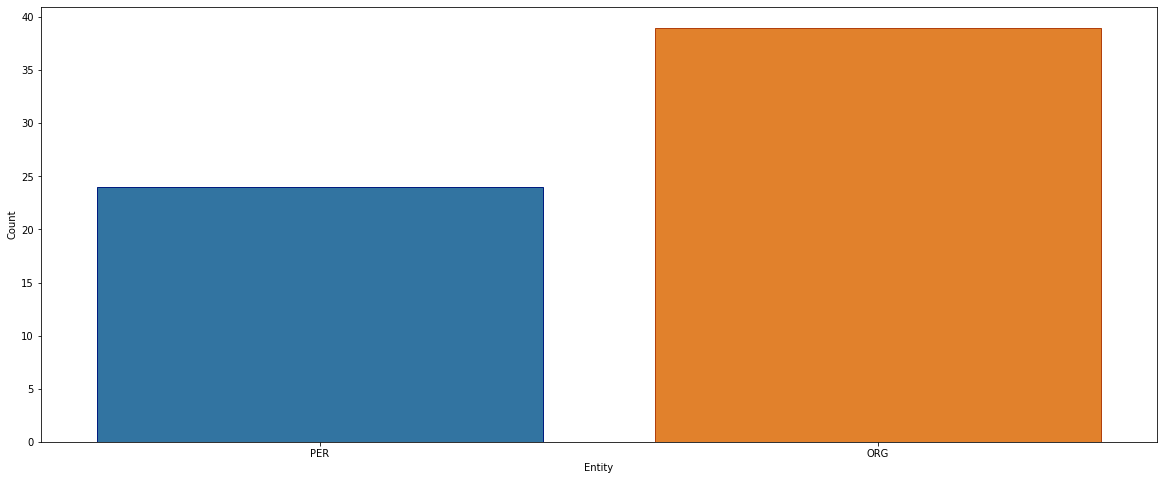

In [42]:
def count_entity(file):
    entity = []
    merge_entity = []
    tmp = ''
    # file = 'entity-tag/AskWhereHRRoomIs.csv'
    with open(file, 'r') as f:
        for word in f:
            word = word.split()
            for x in word:
                x = x.split()
                for i in x:
                    if '/' in i:
                        # print(i)
                        entity.append(i)
    for j in range(len(entity)):
        if ('/B-' in entity[j]):
            tmp = entity[j]
            merge_entity.append(tmp)
        if ("/I-" in entity[j]):
            tmp = merge_entity[-1] + ' ' + entity[j]
            merge_entity[-1] = tmp
    entity_name = []
    entity_type = []
    for j in range(len(entity)):
        if ('/B-' in entity[j]):
            x = entity[j]
            tmp = x.split('/')
            entity_name.append(tmp[0])
            entity_type.append(tmp[1])
            merge_entity.append(tmp[0])
        if ("/I-" in entity[j]):
            x = entity[j]
            y = x.split('/')
            z = y[1]
            tmp = merge_entity[-1] + ' ' + y[0]
            merge_entity[-1] = tmp
            entity_name[-1] = tmp
            entity_type[-1] = y[1]

    entity_df = pd.DataFrame([entity_name,entity_type], index=['Object', 'Entity']).T
        
    entity_df[["x", 'Entity']] = entity_df["Entity"].str.split("-", 1, expand=True)
    entity_df.drop(['x'], axis=1, inplace=True)
    entity_df.duplicated()
    entity_df['Count'] = 1
    final_count = entity_df.groupby(['Object','Entity']).Count.count().reset_index()
    
    final_count[["Entity", 'z']] = final_count["Entity"].str.split(",", 0, expand=True)
    final_count.drop(['z'], axis=1, inplace=True)
  

    plott = final_count.groupby(['Entity'])['Count'].mean().sort_values().reset_index()

    plt.figure(figsize=(20,8))
    sns.barplot(x = "Entity",y="Count",data = plott,
                edgecolor=sns.color_palette("dark", 4))
    
    
    
    return final_count
count_entity('entity-tag/AskAboutAcademicFee.csv')

In [19]:
# import os
# from scipy import stats

# def qqplot(x, y, **kwargs):
#     _, xr = stats.probplot(x, fit=False)
#     _, yr = stats.probplot(y, fit=False)
#     plt.scatter(xr, yr, **kwargs)


# def count_entity():
    
#     arr = os.listdir('entity-tag')
        
#     for i in arr:
#         file = 'entity-tag/' + i
#         # print(file)
        
#         entity = []
#         merge_entity = []
#         tmp = ''
#         # file = 'entity-tag/AskWhereHRRoomIs.csv'
#         with open(file, 'r') as f:
#             for word in f:
#                 word = word.split()
#                 for x in word:
#                     x = x.split()
#                     for i in x:
#                         if '/' in i:
#                             # print(i)
#                             entity.append(i)
#         for j in range(len(entity)):
#             if ('/B-' in entity[j]):
#                 tmp = entity[j]
#                 merge_entity.append(tmp)
#             if ("/I-" in entity[j]):
#                 tmp = merge_entity[-1] + ' ' + entity[j]
#                 merge_entity[-1] = tmp
#         entity_name = []
#         entity_type = []
#         for j in range(len(entity)):
#             if ('/B-' in entity[j]):
#                 x = entity[j]
#                 tmp = x.split('/')
#                 entity_name.append(tmp[0])
#                 entity_type.append(tmp[1])
#                 merge_entity.append(tmp[0])
#             if ("/I-" in entity[j]):
#                 x = entity[j]
#                 y = x.split('/')
#                 tmp = merge_entity[-1] + ' ' + y[0]
#                 merge_entity[-1] = tmp
#                 entity_name[-1] = tmp
#                 entity_type[-1] = y[1]
#         entity_df = pd.DataFrame([entity_name,entity_type], index=['Object', 'Entity']).T
#         entity_df[["x", 'Entity']] = entity_df["Entity"].str.split("-", 1, expand=True)
#         entity_df.drop(['x'], axis=1, inplace=True)
#         entity_df.duplicated()
#         entity_df['Count'] = 1
#         final_count = entity_df.groupby(['Object','Entity']).Count.count().reset_index()
        
#         plott = final_count.groupby(['Entity'])['Count'].mean().sort_values().reset_index()

#         plt.figure(figsize=(20,8))
#         sns.barplot(x = "Entity",y="Count",data = plott,
#                     edgecolor=sns.color_palette("dark", 4))
            
# count_entity()  
#     # return final_count

# # for i in arr:
# #     file = 'entity-tag/'+ str(i)
# #     count_entity(file)
